#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Linear Algebra

You have all seen basic linear algebra before, but this will summarize some different ways of thinking about the fundamental operations.  It also presents concepts in a different order than Sauer's book.

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the Python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Python syntax is `A[:,j]` and `A[i,:]`.

In [3]:
%matplotlib notebook
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = numpy.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

A = numpy.array([[1,2],[3,5],[7,11]])
x = numpy.array([10,20])
matmult1(A, x)

array([ 50, 130, 290])

In [4]:
def matmult2(A, x):
    """Same idea, but more compactly"""
    y = numpy.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

matmult2(A, x)

array([ 50, 130, 290])

In [5]:
def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = numpy.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

matmult3(A, x)

array([ 50, 130, 290])

In [6]:
# We will use this version
A.dot(x)

array([ 50, 130, 290])

### Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though it's not as "bad" as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [7]:
B = numpy.array([[2, 3],[0, 4]])
print(B)
print(B.dot(B.T), B.T.dot(B))
Binv = numpy.linalg.inv(B)
Binv.dot(B), B.dot(Binv)

[[2 3]
 [0 4]]
[[13 12]
 [12 16]] [[ 4  6]
 [ 6 25]]


(array([[ 1.,  0.],
        [ 0.,  1.]]), array([[ 1.,  0.],
        [ 0.,  1.]]))

## Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$
The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X .$$

### Orthogonal matrices

If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$").
A vector is said to be **normalized** if $\lVert x \rVert = 1$.
If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**.
A matrix with orthonormal columns is said to be an **orthogonal matrix**.
We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are linearly independent.
The inverse of a *square* orthogonal matrix is its transpose:
$$ Q^T Q = Q Q^T = I . $$
Orthogonal matrices are a powerful building block for robust numerical algorithms.

<IPython.core.display.Javascript object>


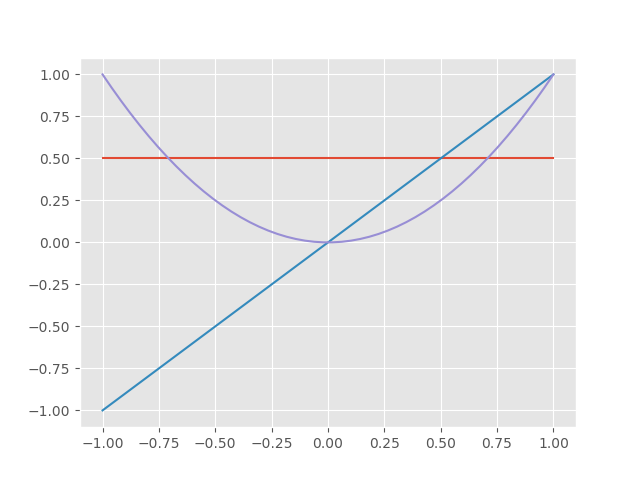

In [8]:
# Make some polynomials
x = numpy.linspace(-1,1)
A = numpy.vander(x, 4)
q0 = A.dot(numpy.array([0,0,0,.5]))  # .5
q1 = A.dot(numpy.array([0,0,1,0]))  # x
q2 = A.dot(numpy.array([0,1,0,0]))  # x^2

pyplot.figure()
pyplot.plot(x, numpy.array([q0, q1, q2]).T)

In [9]:
x

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [10]:
# Inner products of even and odd functions

q0 = q0 / numpy.linalg.norm(q0)
q1.dot(q0), q2.dot(q0), q2.dot(q1)

(-4.9266146717741321e-16, 2.4532276081982261, -2.9976021664879227e-15)

In [11]:
q0

array([ 0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136])

<IPython.core.display.Javascript object>


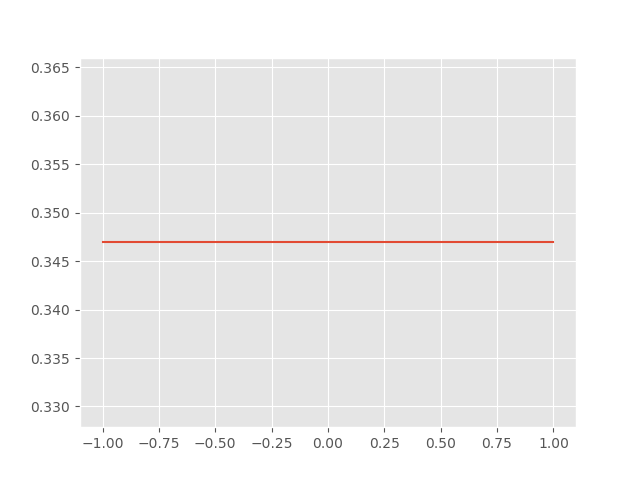

In [12]:
# What is the constant component of q2?

pyplot.figure()
pyplot.plot(x, q2.dot(q0)*q0)

[[  1.00000000e+00  -3.05311332e-16  -3.26435126e-16]
 [ -3.05311332e-16   1.73469388e+01  -2.33146835e-15]
 [ -3.26435126e-16  -2.33146835e-15   4.80888065e+00]]


<IPython.core.display.Javascript object>


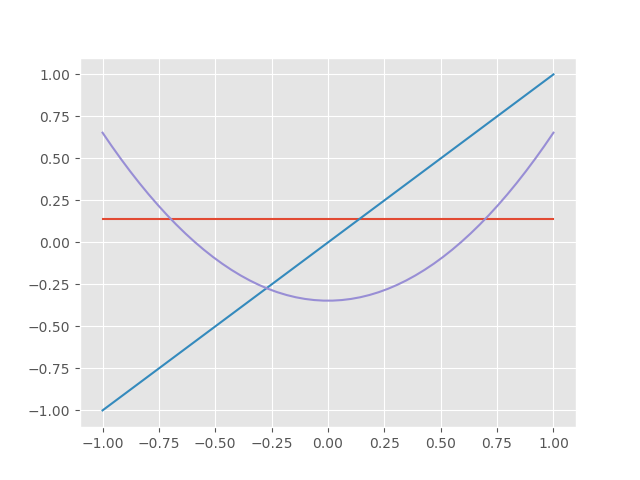

In [13]:
# Let's project that away so that q2 is orthogonal to q0

q2 = q2 - q2.dot(q0)*q0

Q = numpy.array([q0, q1, q2]).T
print(Q.T.dot(Q))
pyplot.figure()
pyplot.plot(x, Q)

## Gram-Schmidt Orthogonalization

Given a collection of vectors (columns of a matrix), we can find an orthogonal basis by applying the above procedure one column at a time.

2.82551740011e-15
5.05011024879e-16


<IPython.core.display.Javascript object>


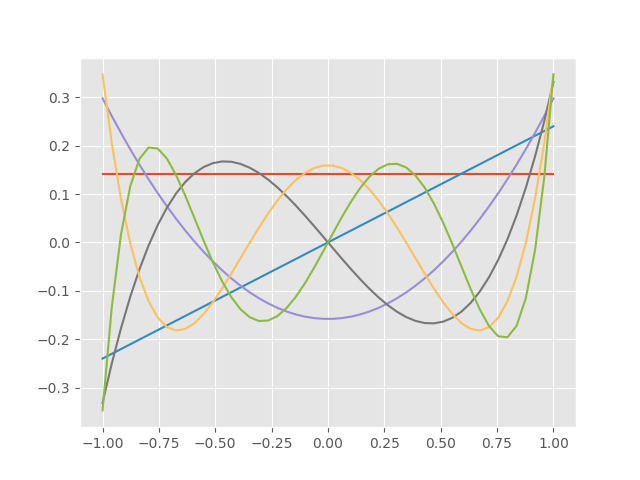

(50, 6)

In [14]:
def gram_schmidt_naive(X):
    Q = numpy.zeros_like(X)
    R = numpy.zeros((len(X.T),len(X.T)))
    for i in range(len(Q.T)):
        v = X[:,i].copy()
        for j in range(i):
            r = v.dot(Q[:,j])
            R[j,i] = r
            v -= r * Q[:,j]    # "modified Gram-Schmidt" - remove each component before next dot product
        R[i,i] = numpy.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

x = numpy.linspace(-1,1,50)
k = 6
A = numpy.vander(x, k, increasing=True)
Q, R = gram_schmidt_naive(A)
print(numpy.linalg.norm(Q.T.dot(Q) - numpy.eye(k)))
print(numpy.linalg.norm(Q.dot(R)-A))
pyplot.figure()
pyplot.plot(x, Q)
A.shape

<IPython.core.display.Javascript object>


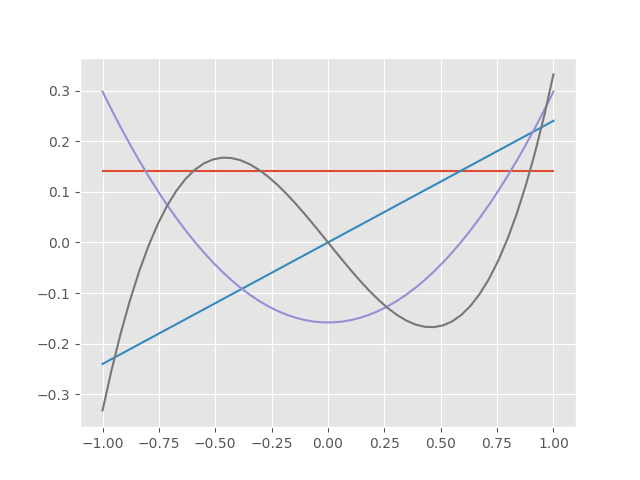

In [15]:
Q, R = gram_schmidt_naive(numpy.vander(x, 4, increasing=True))
pyplot.figure()
pyplot.plot(x, Q)

### Theorem: all full-rank $m\times n$ matrices ($m \ge n$) have a unique $Q R$ factorization with $R_{j,j} > 0$.

### Absolute condition number
Consider a function $f: X \to Y$ and define the *absolute condition number*
$$ \hat\kappa = \lim_{\delta \to 0} \max_{|\delta x| < \delta} \frac{|f(x + \delta x) - f(x)|}{|\delta x|} = \max_{\delta x} \frac{|\delta f|}{|\delta x|}. $$
If $f$ is differentiable, then $\hat\kappa = |f'(x)|$.

### Floating point arithmetic
Floating point arithmetic $x \circledast y := \text{float}(x * y)$ is exact within a relative accuracy $\epsilon_{\text{machine}}$.  Formally,
$$ x \circledast y = (x * y) (1 + \epsilon) $$
for some $|\epsilon| \le \epsilon_{\text{machine}}$.

In [16]:
eps = numpy.float32(1)
while numpy.float32(1) + eps > 1:
    eps /= numpy.float64(2)
eps_machine = 2*eps  # We call this "machine epsilon"
print(eps_machine)

2.22044604925e-16


In [17]:
format((.2 - 1/3) + 2/15, '.20f')

'0.00000000000000002776'

In [18]:
format(.1, '.20f')

'0.10000000000000000555'

### Relative condition number

Given the relative nature of floating point arithmetic, it is more useful to discuss **relative condition number**,
$$ \kappa = \max_{\delta x} \frac{|\delta f|/|f|}{|\delta x|/|x|}
= \max_{\delta x} \Big[ \frac{|\delta f|/|\delta x|}{|f| / |x|} \Big] $$
or, if $f$ is differentiable,
$$ \kappa = \max_{\delta x} |f'(x)| \frac{|x|}{|f|} . $$

How does a condition number get big?

#### Take-home message

The relative accuracy of the best-case algorithm will not be reliably better than $\epsilon_{\text{machine}}$ times the condition number.
$$ \max_{\delta x} \frac{|\delta f|}{|f|} \ge \kappa \cdot \epsilon_{\text{machine}} $$

In [19]:
numpy.log(1 + 1e-10)  - numpy.log1p(1e-10)

8.2740370962658176e-18

## Stability

We use the notation $\tilde f(x)$ to mean a numerical algorithm for approximating $f(x)$.  Additionally, $\tilde x = x (1 + \epsilon)$ is some "good" approximation of the exact input $x$.

### (Forward) Stability
**"nearly the right answer to nearly the right question"**
$$ \frac{\lvert \tilde f(x) - f(\tilde x) \rvert}{| f(\tilde x) |} \in O(\epsilon_{\text{machine}}) $$
for some $\tilde x$ that is close to $x$

### Backward Stability
**"exactly the right answer to nearly the right question"**
$$ \tilde f(x) = f(\tilde x) $$
for some $\tilde x$ that is close to $x$

* Every backward stable algorithm is stable.
* Not every stable algorithm is backward stable.

#### Example: $\tilde f(x) = \text{float}(x) + 1$
The algorithm computes
$$\tilde f(x) = \text{float}(x) \oplus 1 = [x(1+\epsilon_1) + 1](1 + \epsilon_2) = (x + 1 + x\epsilon_1)(1 + \epsilon_2) $$
and we can express any $\tilde x = x(1 + \epsilon_3)$.
To see if if the algorithm is stable, we compute
$$ \frac{\tilde f(x) - f(\tilde x)}{|f(\tilde x)|} = \frac{(x + 1 + x\epsilon_1)(1 + \epsilon_2) - [x(1+ \epsilon_3) + 1]}{\tilde x + 1} = \frac{(x + 1)\epsilon_2 + x(\epsilon_1 - \epsilon_3) + O(\epsilon^2)}{x + 1 + x\epsilon_3} . $$
If we can choose $\epsilon_3$ to make this small, then the method will be (forward) stable, and if we can make this expression exactly zero, then we'll have backward stability.
Trying for the latter, we solve for $\epsilon_3$ by setting the numerator equal to zero,
$$ \epsilon_3 = \frac{x + 1}{x}\epsilon_2 + \epsilon_1 + O(\epsilon^2)/x $$
which is small so long as $|x| \gg 0$, but the first term blows up as $x \to 0$.
In other words, the fact that $\epsilon_2$ can produce a large error relative to the input causes this algorithm to not be backward stable.
In contrast, this $x\to 0$ case is not a problem for forward stability because $\epsilon_3 = \epsilon_1$ yields error on the order of $\epsilon_2$.

#### Example: $\tilde f(x,y) = \text{float}(x) \oplus \text{float}(y)$

Now we are interested in
$$ \frac{\tilde f(x,y) - f(\tilde x,\tilde y)}{f(\tilde x,\tilde y)} $$
and we can vary both $\tilde x$ and $\tilde y$.  If we choose $y=1$, then the ability to vary $\tilde y$ is powerful enough to ensure backward stability.

### Accuracy of backward stable algorithms (Theorem)

A backward stable algorithm for computing $f(x)$ has relative accuracy
$$ \left\lvert \frac{\tilde f(x) - f(x)}{f(x)} \right\rvert \in O(\kappa(f) \epsilon_{\text{machine}}) . $$
This is a rewording of a statement made earlier -- backward stability is the best case.

### Orthogonal polynomials

We used `x = numpy.linspace(-1,1)` which uses $m=50$ points by default.  The number 50 is arbitrary and as we use more points, our columns become better approximations of continuous functions and the vector inner product becomes an integral (up to scaling):
$$ \frac 2 m \sum_{i=1}^m p_i q_i \approx \int_{-1}^1 p(x) q(x) . $$

When we orthogonalize the monomials using this inner product, we get the [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) (up to scaling).  These polynomials have important applications in physics and engineering, as well as playing an important role in approximation (which we will go into in more detail).

### Solving equations using QR

To solve
$$ A x = b $$
we can compute $A = QR$ and then
$$ x = R^{-1} Q^T b . $$

This also works for non-square systems!

<IPython.core.display.Javascript object>


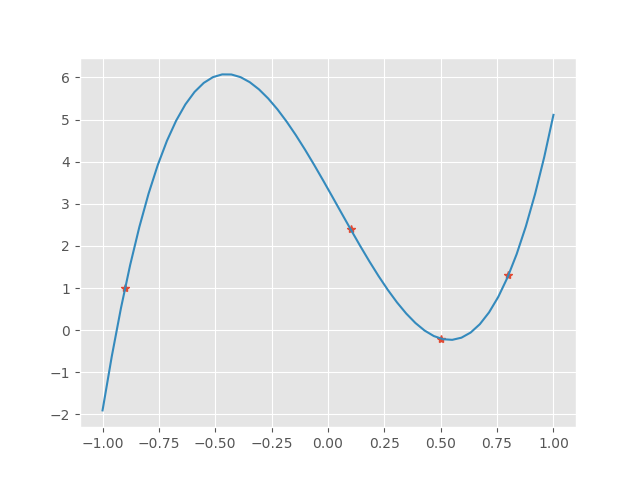

[ 12.98319328  -1.74789916  -9.47605042   3.35210084]
B = [[-0.729  0.81  -0.9    1.   ]
 [ 0.001  0.01   0.1    1.   ]
 [ 0.125  0.25   0.5    1.   ]
 [ 0.512  0.64   0.8    1.   ]] 
p = [ 12.98319328  -1.74789916  -9.47605042   3.35210084]


In [20]:
x1 = numpy.array([-0.9, 0.1, 0.5, 0.8])  # points where we know values
y = numpy.array([1, 2.4, -0.2, 1.3])     # values at those points
pyplot.figure()
pyplot.plot(x1, y, '*')
B = numpy.vander(x1, 4)                     # Vandermonde matrix at the known points
Q, R = gram_schmidt_naive(B)
p = numpy.linalg.solve(R, Q.T.dot(y))             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, numpy.vander(x,4).dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

In [21]:
m = 20
V = numpy.vander(numpy.linspace(-1,1,m), increasing=False)
Q, R = gram_schmidt_naive(V)

def qr_test(qr, V):
    Q, R = qr(V)
    m = len(Q.T)
    print(qr.__name__,
          numpy.linalg.norm(Q.dot(R) - V),
          numpy.linalg.norm(Q.T.dot(Q) - numpy.eye(m)))
    
qr_test(gram_schmidt_naive, V)
qr_test(numpy.linalg.qr, V)

gram_schmidt_naive 1.30436843977e-15 2.45567153168e-09
qr 5.29891431291e-15 2.64462723412e-15


In [22]:
def gram_schmidt_classical(X):
    Q = numpy.zeros_like(X)
    R = numpy.zeros((len(X.T),len(X.T)))
    for i in range(len(Q.T)):
        v = X[:,i].copy()
        R[:i,i] = Q[:,:i].T.dot(v)
        v -= Q[:,:i].dot(R[:i,i])
        R[i,i] = numpy.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

qr_test(gram_schmidt_classical, V[:,:15])
# Q, R = numpy.linalg.qr(V)
#print(Q[:,0])

gram_schmidt_classical 9.16573357896e-16 0.625944679257


Classical Gram-Schmidt is highly parallel, but unstable, as evidenced by the lack of orthogonality in $Q$.

### Right-looking algorithms

The implementations above have been "left-looking"; when working on column $i$, we compare it only to columns to the left (i.e., $j < i$).  We can reorder the algorithm to look to the right by projecting $q_i$ out of all columns $j > i$.  This algorithm is stable while being just as parallel as `gram_schmidt_classical`.

In [23]:
def gram_schmidt_modified(X):
    Q = X.copy()
    R = numpy.zeros((len(X.T), len(X.T)))
    for i in range(len(Q.T)):
        R[i,i] = numpy.linalg.norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:] = Q[:,i+1:].T.dot(Q[:,i])
        Q[:,i+1:] -= numpy.outer(Q[:,i], R[i,i+1:])
    return Q, R

qr_test(gram_schmidt_modified, V)

gram_schmidt_modified 1.07726109481e-15 1.37752509548e-09


### Householder triangularization

Gram-Schmidt methods perform triangular transformations to build an orthogonal matrix.  As we have seen, $X = QR$ is satisfied accurately, but $Q$ may not be orthogonal when $X$ is ill-conditioned.  Householder triangularization instead applies a sequence of orthogonal transformations to build a triangular matrix.

$$ \underbrace{Q_{n-1} \dotsb Q_0}_{Q^T} A = R $$

The structure of the algorithm is

$$ \underbrace{\begin{bmatrix} * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ \end{bmatrix}}_{A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ \end{bmatrix}}_{Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \\ 0 & 0 & * \\ \end{bmatrix}}_{Q_1 Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \\ 0 & 0 & 0 \\ \end{bmatrix}}_{Q_2 Q_1 Q_0 A}
$$

where the elementary orthogonal matrices $Q_i$ chosen to introduce zeros below the diagonal in the $i$th column of $R$.
Each of these transformations will have the form
$$Q_i = \begin{bmatrix} I_i & 0 \\ 0 & F \end{bmatrix}$$
where $F$ is a "reflection" that achieves
$$ F x = \begin{bmatrix} \lVert x \rVert \\ 0 \\ 0 \\ \vdots \end{bmatrix} $$
where $x$ is the column of $R$ from the diagonal down.
This transformation is a reflection across a plane with normal $v = Fx - x = \lVert x \rVert e_1 - x$.

![Householder Reflector (Trefethen and Bau, 1999)](figures/TB-Householder.png)

The reflection, as depected above by Trefethen and Bau (1999) can be written $F = I - 2 \frac{v v^T}{v^T v}$.

In [24]:
def householder_Q_times(V, x):
    """Apply orthogonal matrix represented as list of Householder reflectors"""
    y = x.copy()
    for i in reversed(range(len(V))):
        y[i:] -= 2 * V[i] * V[i].dot(y[i:])
    return y

def qr_householder1(A):
    "Compute QR factorization using naive Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        x = R[i:,i]
        v = -x
        v[0] += numpy.linalg.norm(x)
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = numpy.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, numpy.triu(R[:n,:])

qr_test(qr_householder1, numpy.array([[1.,2],[3,4],[5,6]]))

qr_householder1 1.83102671941e-15 3.1651175078e-16


In [25]:
qr_test(qr_householder1, V)
qr_test(numpy.linalg.qr, V)

qr_householder1 4.45412285287e-15 2.81840274886e-15
qr 5.29891431291e-15 2.64462723412e-15


### Choice of two projections

It turns out our implementation has a nasty deficiency.

In [26]:
qr_test(qr_householder1, numpy.eye(1))

qr_householder1 nan nan


/Users/Eric_Peters/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


In [27]:
qr_test(qr_householder1, numpy.eye(3,2))

/Users/Eric_Peters/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


qr_householder1 nan nan


Inside `qr_householder1`, we have the lines
```
        x = R[i:,i]
        v = -x
        v[0] += numpy.linalg.norm(x)
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
```
What happens when $$x = \begin{bmatrix}1 \\ 0 \end{bmatrix}$$
(i.e., the column of $R$ is already upper triangular)?

We are trying to define a reflector plane (via its normal vector) from the zero vector,
$$v = \lVert x \rVert e_0 - x .$$
When we try to normalize this vector, we divide zero by zero and the algorithm breaks down (`nan`).  Maybe we just need to test for this special case and "skip ahead" when no reflection is needed?  And if so, how would we define $Q$?

In [28]:
qr_test(qr_householder1, numpy.array([[1.,1], [2e-8,1]]))
print(qr_householder1(numpy.array([[1.,1], [2e-8,1]])))

qr_householder1 2.2044604925e-09 4.4408920985e-16
(array([[  1.00000000e+00,  -2.22044605e-08],
       [  2.22044605e-08,   1.00000000e+00]]), array([[ 1.        ,  1.00000002],
       [ 0.        ,  0.99999998]]))


The error $QR - A$ is still $10^{-8}$ for this very well-conditioned matrix so something else must be at play here.

![Choosing the better of two Householder reflectors (Trefethen and Bau, 1999).](figures/TB-Householder2.png)

In [29]:
def qr_householder2(A):
    "Compute QR factorization using Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        v = R[i:,i].copy()
        v[0] += numpy.copysign(numpy.linalg.norm(v), v[0]) # Choose the further of the two reflections
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = numpy.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, numpy.triu(R[:n,:])

qr_test(qr_householder2, numpy.eye(3,2))
qr_test(qr_householder2, numpy.array([[1.,1], [1e-8,1]]))
print(qr_householder2(numpy.array([[1.,1], [1e-8,1]])))

qr_test(qr_householder2, V)

qr_householder2 0.0 0.0
qr_householder2 0.0 0.0
(array([[ -1.00000000e+00,   1.00000000e-08],
       [ -1.00000000e-08,  -1.00000000e+00]]), array([[-1.        , -1.00000001],
       [ 0.        , -0.99999999]]))
qr_householder2 5.05327471085e-15 2.34116901586e-15


We now have a usable implementation of Householder QR.  There are some further concerns for factoring rank-deficient matrices.  We will visit the concept of pivoting later, in the context of LU and Cholesky factorization.

## Condition number of a matrix

We may have informally referred to a matrix as "ill-conditioned" when the columns are nearly linearly dependent, but let's make this concept for precise.  Recall the definition of (relative) condition number from the Rootfinding notes,

$$ \kappa = \max_{\delta x} \frac{|\delta f|/|f|}{|\delta x|/|x|} . $$

We understood this definition for scalar problems, but it also makes sense when the inputs and/or outputs are vectors (or matrices, etc.) and absolute value is replaced by vector (or matrix) norms.  Let's consider the case of matrix-vector multiplication, for which $f(x) = A x$.

$$ \kappa(A) = \max_{\delta x} \frac{\lVert A (x+\delta x) - A x \rVert/\lVert A x \rVert}{\lVert \delta x\rVert/\lVert x \rVert}
= \max_{\delta x} \frac{\lVert A \delta x \rVert}{\lVert \delta x \rVert} \, \frac{\lVert x \rVert}{\lVert A x \rVert} = \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} . $$

There are two problems here:

* I wrote $\kappa(A)$ but my formula depends on $x$.
* What is that $\lVert A \rVert$ beastie?

### Stack push: Matrix norms

Vector norms are built into the linear space (and defined in term of the inner product).  Matrix norms are *induced* by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} . $$

* This equation makes sense for non-square matrices -- the vector norms of the input and output spaces may differ.
* Due to linearity, all that matters is direction of $x$, so it could equivalently be written

$$ \lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert . $$

### Stack pop

Now we understand the formula for condition number, but it depends on $x$.  Consider the matrix

$$ A = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} . $$

* What is the norm of this matrix?
* What is the condition number when $x = [1,0]^T$?
* What is the condition number when $x = [0,1]^T$?

The condition number of matrix-vector multiplication depends on the vector.  The condition number of the matrix is the worst case (maximum) of the condition number for any vector, i.e.,

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} .$$

If $A$ is invertible, then we can rephrase as

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} =
\max_{A x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} = \lVert A \rVert \lVert A^{-1} \rVert . $$

Evidently multiplying by a matrix is just as ill-conditioned of an operation as solving a linear system using that matrix.

In [30]:
def R_solve(R, b):
    """Solve Rx = b using back substitution."""
    x = b.copy()
    m = len(b)
    for i in reversed(range(m)):
        x[i] -= R[i,i+1:].dot(x[i+1:])
        x[i] /= R[i,i]
    return x

x = numpy.linspace(-1,1,15)
A = numpy.vander(x, 4)
print(A.shape)
Q, R = numpy.linalg.qr(A)
b = Q.T.dot(A.dot(numpy.array([1,2,3,4])))
numpy.linalg.norm(R_solve(R, b) - numpy.linalg.solve(R, b))
R_solve(R, b)

(15, 4)


array([ 1.,  2.,  3.,  4.])

### Cost of Householder factorization

The dominant cost comes from the line
```Python
    R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
```
were `R[i:,i:]` is an $(m-i)\times(n-i)$ matrix.
This line performs $2(m-i)(n-i)$ operations in `v.dot(R[i:,i:])`, another $(m-i)(n-i)$ in the "outer" product and again in subtraction.  As written, multiplication by 2 would be another $(m-i)(n-i)$ operations, but is only $m-i$ operations if we rewrite as
```Python
    w = 2*v
    R[i:,i:] -= numpy.outer(w, v.dot(R[i:,i:]))
```
in which case the leading order cost is $4(m-i)(n-i)$.  To compute the total cost, we need to sum over all columns $i$,
$$\begin{split} \sum_{i=1}^n 4(m-i)(n-i) &= 4 \Big[ \sum_{i=1}^n (m-n)(n-i) + \sum_{i=1}^n (n-i)^2 \Big] \\
&= 4 (m-n) \sum_{i=1}^n i + 4 \sum_{i=1}^n i^2 \\
&\approx 2 (m-n) n^2 + 4 n^3/3 \\
&= 2 m n^2 - \frac 2 3 n^3 .
\end{split}$$
Recall that Gram-Schmidt QR cost $2 m n^2$, so Householder costs about the same when $m \gg n$ and is markedly less expensive when $m \approx n$.

## Least squares and the normal equations

A **least squares problem** takes the form: given an $m\times n$ matrix $A$ ($m \ge n$), find $x$ such that
$$ \lVert Ax - b \rVert $$
is minimized.  If $A$ is square and full rank, then this minimizer will satisfy $A x - b = 0$, but that is not the case in general because $b$ is not in the range of $A$.
The residual $A x - b$ must be orthogonal to the range of $A$.

* Is this the same as saying $A^T (A x - b) = 0$?
* If $QR = A$, is it the same as $Q^T (A x - b) = 0$?

In HW2, we showed that $QQ^T$ is an orthogonal projector onto the range of $Q$.  If $QR = A$,
$$ QQ^T (A x - b) = QQ^T(Q R x - b) = Q (Q^T Q) R x - QQ^T b = QR x - QQ^T b = A x - QQ^T b . $$
So if $b$ is in the range of $A$, we can solve $A x = b$.  If not, we need only *orthogonally* project $b$ into the range of $A$.

### Solution by QR (Householder)

Solve $R x = Q^T b$.

* QR factorization costs $2 m n^2 - \frac 2 3 n^3$ operations and is done once per matrix $A$.
* Computing $Q^T b$ costs $4 (m-n)n + 2 n^2 = 4 mn - 2n^2$ (using the elementary reflectors, which are stable and lower storage than naive storage of $Q$).
* Solving with $R$ costs $n^2$ operations.  Total cost per right hand side is thus $4 m n - n^2$.

This method is stable and accurate.

### Solution by Cholesky

The mathematically equivalent form $(A^T A) x = A^T b$ are called the **normal equations**.  The solution process involves factoring the symmetric and positive definite $n\times n$ matrix $A^T A$.

* Computing $A^T A$ costs $m n^2$ flops, exploiting symmetry.
* Factoring $A^T A = R^T R$ costs $\frac 1 3 n^3$ flops.  The total factorization cost is thus $m n^2 + \frac 1 3 n^3$.
* Computing $A^T b$ costs $2 m n$.
* Solving with $R^T$ costs $n^2$.
* Solving with $R$ costs $n^2$.  Total cost per right hand side is thus $2 m n + 2 n^2$.

The product $A^T A$ is ill-conditioned: $\kappa(A^T A) = \kappa(A)^2$ and can reduce the accuracy of a least squares solution.

### Solution by Singular Value Decomposition

Next, we will discuss a factorization
$$ U \Sigma V^T = A $$
where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal with nonnegative entries.
The entries of $\Sigma$ are called **singular values** and this decomposition is the **singular value decomposition** (SVD).
It may remind you of an eigenvalue decomposition $X \Lambda X^{-1} = A$, but
* the SVD exists for all matrices (including non-square and deficient matrices)
* $U,V$ have orthogonal columns (while $X$ can be arbitrarily ill-conditioned).
Indeed, if a matrix is symmetric and positive definite (all positive eigenvalues), then $U=V$ and $\Sigma = \Lambda$.
Computing an SVD requires a somewhat complicated iterative algorithm, but a crude estimate of the cost is $2 m n^2 + 11 n^3$.  Note that this is similar to the cost of $QR$ when $m \gg n$, but much more expensive for square matrices.
Solving with the SVD involves
* Compute $U^T b$ at a cost of $2 m n$.
* Solve with the diagonal $n\times n$ matrix $\Sigma$ at a cost of $n$.
* Apply $V$ at a cost of $2 m n$.  The total cost per right hand side is thus $4 m n$.

### Pseudoinverse

An alternative is to explicitly form the $n\times m$ pseudoinverse $A^\dagger = R^{-1} Q^T$ (at a cost of $mn^2$) at which point each right hand side costs $2 mn$.  Why might we do this?

* Lots of right hand sides
* Real-time solution


In [31]:
# Test accuracy of solver for an ill-conditioned square matrix

x = numpy.linspace(-1,1,19)
A = numpy.vander(x)
print('cond(A) = ',numpy.linalg.cond(A))
Q, R = numpy.linalg.qr(A)
print('cond(R^{-1} Q^T A) =', numpy.linalg.cond(numpy.linalg.solve(R, Q.T.dot(A))))
L = numpy.linalg.cholesky(A.T.dot(A))
print('cond(L^{-T} L^{-1} A^T A) =', numpy.linalg.cond(numpy.linalg.solve(L.T, numpy.linalg.solve(L, A.T.dot(A)))))

cond(A) =  90847309.6279
cond(R^{-1} Q^T A) = 1.00000000131
cond(L^{-T} L^{-1} A^T A) = 2.61774429697


## The [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

The SVD is the decomposition
$$ U \Sigma V^h = A $$
where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal and nonnegative.
Evidenly an arbitrary matrix consists of
1. Orthogonal matrix -- rotation and reflection
2. Diagonal scaling (transforms a sphere into an ellipsoid aligned to the coordinate axes)
3. Orthogonal matrix -- rotation and reflection

It is typical to order the singular values in descending order.

The inverse has the same behavior:

$$ A^{-1} = V \Sigma^{-1} U^h $$

The matrix norm is the largest singular value

$$ \lVert A \rVert = \sigma_{\max} . $$

The largest value in $\Sigma^{-1}$ is $\sigma_\min^{-1}$, so

$$ \lVert A^{-1} \rVert = \sigma_\min^{-1} . $$

We showed previously that

$$\kappa(A) = \lVert A \rVert \, \lVert A^{-1} \rVert $$

so now we can also write

$$ \kappa(A) = \frac{\sigma_\max}{\sigma_\min} . $$

The SVD is a crucial tool in statistics and dimensionality reduction, often under names like

* [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)
* Proper Orthogonal Decomposition (POD)
* Karhunen-Loeve Expansion

In this context, one computes an SVD of a data matrix and finds that the spectrum $\Sigma$ decays rapidly and only the $k \ll n$ components larger than some threshold are "important".  The dense matrix can thus be approximated as

$$ \hat U \hat \Sigma \hat V^h $$

by keeping only the first (largest) $k$ columns.  This reduces the storage from $mn$ entries to $mk + kn$ entries.

# QR parallelism and performance

Let's turn back to our Householder QR, but perform an in-place factorization similar to LAPACK `dgeqrf`.  Note that the orthogonal part of factored matrices can be applied using `dormqr`.

In [32]:
class QR:
    def __init__(self, F, tau):
        self.F = F
        self.tau = tau
    def R(self):
        n = len(self.tau)
        return numpy.triu(self.F[:n,:])
    def Qdot(self, x):
        n = len(x)
        k = x.shape[1] if len(x.shape) == 2 else 1
        if n != len(self.tau):
            raise ValueError("operands could not be multiplied with shapes", self.F.shape, x.shape)
        y = numpy.zeros((len(self.F), k))
        y[:n,:] = x
        for i in reversed(range(len(self.tau))):
            #   y -= tau * v * v' y
            # where v = [1; F[i+1:,i]]
            tmp = y[i] + self.F[i+1:,i].dot(y[i+1:])
            y[i] -= self.tau[i] * tmp
            y[i+1:] -= self.tau[i] * numpy.outer(self.F[i+1:,i], tmp)
        return y
        
def qr_householder_inplace(A):
    "Compute QR factorization using Householder reflection"
    m, n = A.shape
    F = A.copy()
    tau = numpy.zeros(len(A.T))
    for i in range(n):
        v = F[i:,i].copy()
        F[i,i] = -numpy.copysign(numpy.linalg.norm(v), v[0]) # Choose the further of the two reflections
        v[0] -= F[i,i]
        v /= v[0]
        tau[i] = 2 / numpy.linalg.norm(v)**2
        # Store the reflector in the lower triangular part of R
        F[i+1:,i] = v[1:]
        # Update the remaining panel
        F[i:,i+1:] -= tau[i] * numpy.outer(v, v.dot(F[i:,i+1:]))
    return QR(F, tau)

m, n = 5, 3
x = numpy.linspace(-1,1,m)
A = numpy.vander(x, n, increasing=True)
qr = qr_householder_inplace(A)
R = qr.R()
I = numpy.eye(n)
Q1 = qr.Qdot(I)
print(numpy.linalg.norm(Q1.T.dot(Q1) - I),
      numpy.linalg.norm(qr.Qdot(R)-A))

3.67423146834e-16 8.08254562088e-16


In [33]:
Q, R = qr_householder2(A)
print(numpy.linalg.norm(R - qr.R()),
      numpy.linalg.norm(Q1 - Q))

1.11022302463e-16 3.64010961612e-16


In [34]:
def cosspace(a, b, n):
    return (a+b)/2 + (b-a)/2 * numpy.cos(numpy.linspace(0, numpy.pi, n))
def vander_cheb(x, k):
    A = numpy.zeros((len(x), k))
    if k > 0:
        A[:,0] = 1
    if k > 1:
        A[:,1] = x
    for j in range(2,k):
        A[:,j] = 2*x*A[:,j-1] - A[:,j-2]
    return A
x = cosspace(-1, 1, 1000)
A = vander_cheb(x, 500)
numpy.linalg.cond(A)

378.50645511065005

### QR blocking

Applying the orthogonal factor $Q$, both during factorization and on each iteration, is sequential.  For matrix-matrix multiplication, we found that blocking was extremely important for performance.  The same is true here, but we will need a transform.  We would like to represent a sequence of elementary reflectors as a single block reflector:

$$\begin{gather} (I - v_0 \tau_0 v_0^T) (I - v_1 \tau_1 v_1^T) &= I - v_0 \tau_0 v_0^T + v_0 \tau_0 v_0^T v_1 \tau_1 v_1^T - v_1 \tau_1 v_1^T \\
&= I - V \begin{bmatrix} \tau_0 & \tau_{01} \\ 0 & \tau_1 \end{bmatrix} V^T \end{gather} $$
where $V = [ v_0 | v_1 ]$ is an $m\times 2$ matrix and $\tau_{01} = -\tau_0 v_0^T v_1 \tau_1$. This representation can be created recursively and is called the "compact WY" representation of $Q$ and can be computed using LAPACK's `dgeqrt2`.

In [35]:
class QRT:
    def __init__(self, F, T):
        self.F = F
        self.T = T
        self.shape = self.F.shape
    def R(self):
        n = len(self.T)
        return numpy.triu(self.F[:n,:])
    def Qdot(self, x):
        m, n = self.shape
        k = x.shape[1] if len(x.shape) == 2 else 1
        if x.shape[0] not in {n, m}:
            raise ValueError("operands could not be multiplied with shapes", self.shape, x.shape)
        y = numpy.zeros((m, k))
        y[:x.shape[0]] = x
        D = numpy.tril(self.F[:n])
        numpy.fill_diagonal(D, 1)
        tmp = D.T.dot(x[:n])
        if x.shape[0] > n:
            tmp += self.F[n:].T.dot(x[n:])
        tmp = self.T.dot(tmp)
        y[:n] -= D.dot(tmp)
        y[n:] -= self.F[n:].dot(tmp)
        return y
    
def qr_householder_wy(A):
    "Compute QR factorization using blocked Householder reflection, result in compact WY"
    m, n = A.shape
    F = A.copy()
    T = numpy.zeros((n, n))
    for i in range(n):
        v = F[i:,i] # in-place
        d = v[1:].dot(v[1:])
        norm = numpy.sqrt(v[0]**2 + d)
        Rii = -numpy.copysign(norm, v[0]) # Choose the further of the two reflections
        v[0] -= Rii
        tau = 2 * v[0]**2 / (v[0]**2 + d)
        v /= v[0]
        # Update the remaining panel
        F[i:,i+1:] -= tau * numpy.outer(v, v.dot(F[i:,i+1:]))
        T[i,i] = tau
        if i > 0: # Add this column to T
            T[:i,i] = -tau * T[:i,:i].dot(F[i:,:i].T.dot(v))
        print(numpy.matrix(T))    
        F[i,i] = Rii
        
    return QRT(F, T)

m, n = 5, 5
A = vander_cheb(cosspace(-1,1,m), n)
qrt = qr_householder_wy(A)
qr = qr_householder_inplace(A)
I = numpy.eye(n,n)
print(numpy.linalg.norm(qrt.R() - qr.R()), numpy.linalg.norm(qrt.Qdot(I) - qr.Qdot(I)))

[[ 1.4472136  0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.       ]]
[[ 1.4472136   0.13013667  0.          0.          0.        ]
 [ 0.          1.22983725  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 1.4472136   0.13013667 -0.90642626  0.          0.        ]
 [ 0.          1.22983725  0.44567229  0.          0.        ]
 [ 0.          0.          1.90364682  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 1.4472136   0.13013667 -0.90642626  0.2110743   0.        ]
 [ 0.         

Factoring a large square matrix in this way is generally not optimal; it usually better to factor each block of columns using a WY representation, resulting in a sequence of block reflectors.  Start by partitioning the original matrix to create a $k\times k$ block $A_{00}$.

$$ \begin{bmatrix} A_{00} & A_{01} \\ A_{01} & A_{11} \end{bmatrix} $$

Compute the factorization $Q_0 R_0 = \begin{bmatrix} A_{00} \\ A_{10} \end{bmatrix}$ where $Q_0 = I - V T V^T$ is a block reflector.  Update

$$Q_0^T A = \begin{bmatrix} R_0 & Q_0^T A_{:,1} \end{bmatrix} $$

where $V$ can be stored in the sub-diagonal part of $R_0$ plus the triangular block $T$.  Repeat this procedure (repartition, panel factorization, and block reflections) for the lower-right panel (formerly the $A_{11}$ block).  The LAPACK function `dgeqrt` creates a block factorization of this form.

## Tall-Skinny QR

For matrices with many more columns than the block size $k$, almost all the work goes into the panel updates $Q_0^T A_{:,1}$ and it is sufficient to parallelize those block reflections.  For problems with few columns, we need to parallelize the panel factorization.  This is possible using the TSQR algorithm, which is based on the recursive relation

$$ \begin{bmatrix} A_0 \\ A_1 \end{bmatrix}
= \begin{bmatrix} Q_0 & 0 \\ 0 & Q_1 \end{bmatrix} \underbrace{\begin{bmatrix} R_0 \\ R_1 \end{bmatrix}}_{\bar Q \bar R}
$$

In [36]:
class QRTS:
    def __init__(self, qr0, qr1, qr):
        self.qr0 = qr0
        self.qr1 = qr1
        self.qr = qr
        self.shape = (self.qr0.shape[0] + self.qr1.shape[0], self.qr.shape[1])
    def R(self):
        return self.qr.R()
    def Qdot(self, x):
        m, n = self.shape
        k = x.shape[1] if len(x.shape) == 2 else 1
        y = numpy.zeros((m, k))
        tmp = self.qr.Qdot(x)
        y[:m//2] = self.qr0.Qdot(tmp[:n])
        y[m//2:] = self.qr1.Qdot(tmp[n:])
        return y

def tsqr(A):
    m, n = A.shape
    if m <= 2*n:
        return qr_householder_wy(A)
    else:
        qr0 = tsqr(A[:m//2])
        qr1 = tsqr(A[m//2:])
        B = numpy.concatenate([qr0.R(), qr1.R()])
        qr = tsqr(B)
        return QRTS(qr0, qr1, qr)
    
m, n = 6, 3
A = vander_cheb(cosspace(-1,1,m), n)
qrt = qr_householder_wy(A)
qrts = tsqr(A)
I = numpy.eye(n, n)
Qts = qrts.Qdot(I)
print(numpy.linalg.norm(Qts.T.dot(Qts) - I), numpy.linalg.norm(Qts.dot(qrts.R()) - A))

[[ 1.40824829  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[ 1.40824829  0.12627419  0.        ]
 [ 0.          1.2774808   0.        ]
 [ 0.          0.          0.        ]]
[[ 1.40824829  0.12627419 -0.86569392]
 [ 0.          1.2774808   0.04413166]
 [ 0.          0.          1.66628886]]
[[ 1.40824829  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[ 1.40824829  0.12627419  0.        ]
 [ 0.          1.2774808   0.        ]
 [ 0.          0.          0.        ]]
[[ 1.40824829  0.12627419 -0.86569392]
 [ 0.          1.2774808   0.04413166]
 [ 0.          0.          1.66628886]]
3.86247859119e-16 1.26584900906e-15


In [37]:
A

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.99589079,  2.98358003,  3.9590091 ],
       [ 1.        ,  1.98358003,  2.93458973,  3.83741354],
       [ 1.        ,  1.96311831,  2.85383351,  3.63929452],
       [ 1.        ,  1.93458973,  2.74263741,  3.37128843],
       [ 1.        ,  1.89811149,  2.60282724,  3.04234481],
       [ 1.        ,  1.85383351,  2.4366987 ,  2.6634002 ],
       [ 1.        ,  1.80193774,  2.2469796 ,  2.2469796 ],
       [ 1.        ,  1.74263741,  2.03678514,  1.80674056],
       [ 1.        ,  1.67617621,  1.80956669,  1.35697642],
       [ 1.        ,  1.60282724,  1.56905517,  0.91209713],
       [ 1.        ,  1.52289192,  1.31919979,  0.48610678],
       [ 1.        ,  1.4366987 ,  1.06410316,  0.09209692],
       [ 1.        ,  1.34460178,  0.80795395, -0.25822546],
       [ 1.        ,  1.2469796 ,  0.55495813, -0.55495813],
       [ 1.        ,  1.14423332,  0.30926989, -0.79035641],
       [ 1.        ,  1.